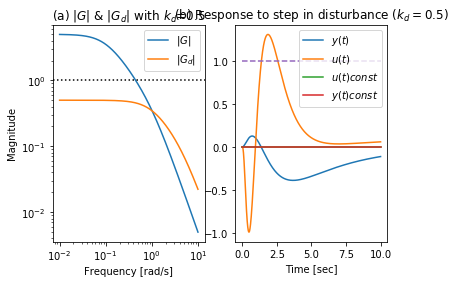

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from utilsplot import step_response_plot
from utils import feedback, tf


s = tf([1,0], 1)

Kd = 0.5

G = 5/((10*s + 1)*(s - 1))
Gd = Kd/((s + 1)*(0.2*s + 1))
K = 0.04/s*((10*s + 1)**2)/((0.1*s + 1)**2)

L = G * K

# Transfer function between disturbance and output y
S = feedback(1, L) * Gd

# Transfer function between disturbance and controller input u
Gu = -S * K

plt.figure('Figure 5.16 (a)')

plt.subplot(1, 2, 1)
w = np.logspace(-2, 1, 1000)
wi = w*1j
plt.loglog(w, np.abs(G(wi)))
plt.loglog(w, np.abs(Gd(wi)))
plt.axhline(1, color='black', linestyle=':')
plt.title('(a) $|G|$ & $|G_d|$ with $k_d$=0.5')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude')
plt.legend(('$|G|$', '$|G_d|$'), loc=1)

plt.subplot(1, 2, 2)
step_response_plot(S, Gu, t_end=10, constraint=1)  # TODO y(t)const is not yet correct
plt.title('(b) Response to step in disturbance ($k_d=0.5$)')

plt.show()
